<a href="https://colab.research.google.com/github/mharis0014/cv/blob/master/smileDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
from zipfile import ZipFile
file_name = "datasets.zip"

with ZipFile (file_name, 'r') as zip:
  zip.extractall()
  print('Data extract from zip file')

Data extract from zip file


Convolutional Neural Network

Installing Theano
pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git

Installing Tensorflow
Install Tensorflow from the website: https://www.tensorflow.org/versions/r0.12/get_started/os_setup.html

Installing Keras
pip install --upgrade keras

***Part 1 - Building the CNN***

In [0]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [0]:
# Initialising the CNN
classifier = Sequential()

In [0]:
# Step 1 - Convolution
classifier.add(Convolution2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

In [0]:
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [0]:
# Adding a second convolutional layer
classifier.add(Convolution2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [0]:
# Step 3 - Flattening
classifier.add(Flatten())

In [0]:
# Step 4 - Full connection
classifier.add(Dense(activation = "relu", units = 128))
classifier.add(Dense(activation = "sigmoid", units = 1))

In [0]:
# Compiling the CNN
classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

***Part 2 - Fitting the CNN to the images***

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

In [0]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [53]:
training_set = train_datagen.flow_from_directory('datasets/train_folder',
                                                target_size=(64, 64),
                                                batch_size=32,
                                                class_mode='binary')

Found 2800 images belonging to 2 classes.


In [54]:
test_set = test_datagen.flow_from_directory('datasets/test_folder',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

Found 1200 images belonging to 2 classes.


In [55]:
classifier.fit_generator(training_set,
                        steps_per_epoch=2800,
                        epochs=15,
                        validation_data=test_set,
                        validation_steps=1200)

Epoch 1/15
2800/2800 [==============================] - 191s 68ms/step - loss: 0.3354 - accuracy: 0.8489 - val_loss: 0.3612 - val_accuracy: 0.8902
Epoch 2/15
2800/2800 [==============================] - 191s 68ms/step - loss: 0.1725 - accuracy: 0.9291 - val_loss: 0.3675 - val_accuracy: 0.8989
Epoch 3/15
2800/2800 [==============================] - 190s 68ms/step - loss: 0.0920 - accuracy: 0.9646 - val_loss: 0.0824 - val_accuracy: 0.9067
Epoch 4/15
2800/2800 [==============================] - 190s 68ms/step - loss: 0.0501 - accuracy: 0.9811 - val_loss: 0.5574 - val_accuracy: 0.8966
Epoch 5/15
2800/2800 [==============================] - 191s 68ms/step - loss: 0.0352 - accuracy: 0.9872 - val_loss: 0.1868 - val_accuracy: 0.8902
Epoch 6/15
2800/2800 [==============================] - 191s 68ms/step - loss: 0.0258 - accuracy: 0.9912 - val_loss: 0.5592 - val_accuracy: 0.8894
Epoch 7/15
2800/2800 [==============================] - 191s 68ms/step - loss: 0.0205 - accuracy: 0.9935 - val_loss: 0

In [0]:
# Evaluation
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import numpy as np
import imutils
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from keras.preprocessing import image

***Prediction Part***

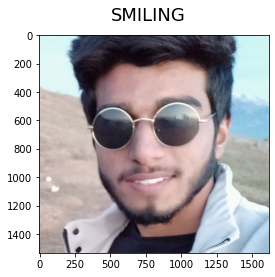

In [67]:
img_src = 's12.jpg'
img = cv2.imread(img_src)

img_pred = image.load_img('s12.jpg', target_size = (64, 64))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)
rslt = classifier.predict(img_pred)

ind = training_set.class_indices

if rslt[0][0] == 1:
    prediction = "SMILING"
else:
    prediction = "Neutral"

target_width = 50
target_height = 50
target_size = (target_width, target_height)

img = cv2.resize(img, target_size)
img = img.reshape(1, target_width, target_height, 3)


fig, ax = plt.subplots()
fig.suptitle(prediction, fontsize=18)

np_img = mpimg.imread(img_src)
plt.imshow(np_img)

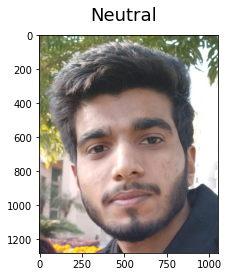

In [75]:
img_src = 'n18.jpeg'
img = cv2.imread(img_src)
##Prediction Part

img_pred = image.load_img('n18.jpeg', target_size = (64, 64))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)
rslt = classifier.predict(img_pred)

ind = training_set.class_indices

if rslt[0][0] == 1:
    prediction = "SMILING"
else:
    prediction = "Neutral"

target_width = 50
target_height = 50
target_size = (target_width, target_height)

img = cv2.resize(img, target_size)
img = img.reshape(1, target_width, target_height, 3)


fig, ax = plt.subplots()
fig.suptitle(prediction, fontsize=18)

np_img = mpimg.imread(img_src)
plt.imshow(np_img)

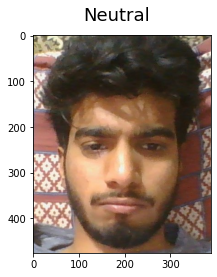

In [80]:
img_src = 'WIN_5.jpg'
img = cv2.imread(img_src)
##Prediction Part

img_pred = image.load_img('WIN_5.jpg', target_size = (64, 64))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)
rslt = classifier.predict(img_pred)

ind = training_set.class_indices

if rslt[0][0] == 1:
    prediction = "SMILING"
else:
    prediction = "Neutral"

target_width = 50
target_height = 50
target_size = (target_width, target_height)

img = cv2.resize(img, target_size)
img = img.reshape(1, target_width, target_height, 3)


fig, ax = plt.subplots()
fig.suptitle(prediction, fontsize=18)

np_img = mpimg.imread(img_src)
plt.imshow(np_img)

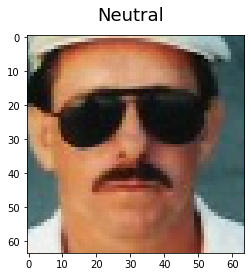

In [70]:
img_src = 'n9.jpg'
img = cv2.imread(img_src)
##Prediction Part

img_pred = image.load_img('n9.jpg', target_size = (64, 64))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)
rslt = classifier.predict(img_pred)

ind = training_set.class_indices

if rslt[0][0] == 1:
    prediction = "SMILING"
else:
    prediction = "Neutral"

target_width = 50
target_height = 50
target_size = (target_width, target_height)

img = cv2.resize(img, target_size)
img = img.reshape(1, target_width, target_height, 3)


fig, ax = plt.subplots()
fig.suptitle(prediction, fontsize=18)

np_img = mpimg.imread(img_src)
plt.imshow(np_img)

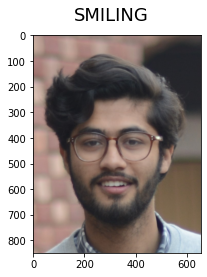

In [71]:
img_src = 'DSC_0112.JPG'
img = cv2.imread(img_src)
##Prediction Part

img_pred = image.load_img('DSC_0112.JPG', target_size = (64, 64))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)
rslt = classifier.predict(img_pred)

ind = training_set.class_indices

if rslt[0][0] == 1:
    prediction = "SMILING"
else:
    prediction = "Neutral"

target_width = 50
target_height = 50
target_size = (target_width, target_height)

img = cv2.resize(img, target_size)
img = img.reshape(1, target_width, target_height, 3)


fig, ax = plt.subplots()
fig.suptitle(prediction, fontsize=18)

np_img = mpimg.imread(img_src)
plt.imshow(np_img)

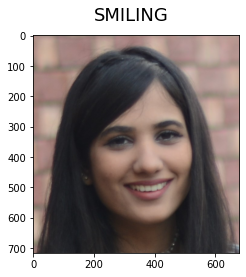

In [72]:
img_src = 'DSC_0122.jpg'
img = cv2.imread(img_src)
##Prediction Part

img_pred = image.load_img('DSC_0122.jpg', target_size = (64, 64))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)
rslt = classifier.predict(img_pred)

ind = training_set.class_indices

if rslt[0][0] == 1:
    prediction = "SMILING"
else:
    prediction = "Neutral"

target_width = 50
target_height = 50
target_size = (target_width, target_height)

img = cv2.resize(img, target_size)
img = img.reshape(1, target_width, target_height, 3)


fig, ax = plt.subplots()
fig.suptitle(prediction, fontsize=18)

np_img = mpimg.imread(img_src)
plt.imshow(np_img)

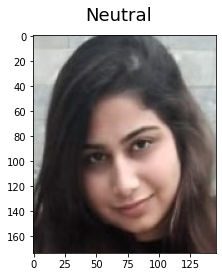

In [81]:
img_src = 'n16.jpeg'
img = cv2.imread(img_src)
##Prediction Part

img_pred = image.load_img('n16.jpeg', target_size = (64, 64))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)
rslt = classifier.predict(img_pred)

ind = training_set.class_indices

if rslt[0][0] == 1:
    prediction = "SMILING"
else:
    prediction = "Neutral"

target_width = 50
target_height = 50
target_size = (target_width, target_height)

img = cv2.resize(img, target_size)
img = img.reshape(1, target_width, target_height, 3)


fig, ax = plt.subplots()
fig.suptitle(prediction, fontsize=18)

np_img = mpimg.imread(img_src)
plt.imshow(np_img)

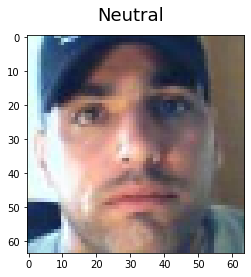

In [59]:
img_src = 'n1.jpg'
img = cv2.imread(img_src)
##Prediction Part

img_pred = image.load_img('n1.jpg', target_size = (64, 64))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)
rslt = classifier.predict(img_pred)

ind = training_set.class_indices

if rslt[0][0] == 1:
    prediction = "SMILING"
else:
    prediction = "Neutral"

target_width = 50
target_height = 50
target_size = (target_width, target_height)

img = cv2.resize(img, target_size)
img = img.reshape(1, target_width, target_height, 3)


fig, ax = plt.subplots()
fig.suptitle(prediction, fontsize=18)

np_img = mpimg.imread(img_src)
plt.imshow(np_img)

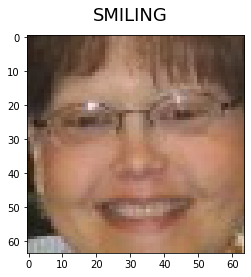

In [61]:
img_src = 'smile1.jpg'
img = cv2.imread(img_src)
##Prediction Part

img_pred = image.load_img('smile1.jpg', target_size = (64, 64))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)
rslt = classifier.predict(img_pred)

ind = training_set.class_indices

if rslt[0][0] == 1:
    prediction = "SMILING"
else:
    prediction = "Neutral"

target_width = 50
target_height = 50
target_size = (target_width, target_height)

img = cv2.resize(img, target_size)
img = img.reshape(1, target_width, target_height, 3)


fig, ax = plt.subplots()
fig.suptitle(prediction, fontsize=18)

np_img = mpimg.imread(img_src)
plt.imshow(np_img)

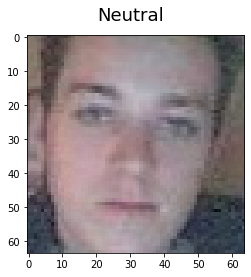

In [62]:
img_src = 'n2.jpg'
img = cv2.imread(img_src)
##Prediction Part

img_pred = image.load_img('n2.jpg', target_size = (64, 64))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)
rslt = classifier.predict(img_pred)

ind = training_set.class_indices

if rslt[0][0] == 1:
    prediction = "SMILING"
else:
    prediction = "Neutral"

target_width = 50
target_height = 50
target_size = (target_width, target_height)

img = cv2.resize(img, target_size)
img = img.reshape(1, target_width, target_height, 3)


fig, ax = plt.subplots()
fig.suptitle(prediction, fontsize=18)

np_img = mpimg.imread(img_src)
plt.imshow(np_img)

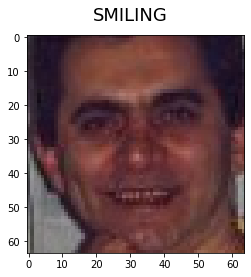

In [63]:
img_src = 'smile2.jpg'
img = cv2.imread(img_src)
##Prediction Part

img_pred = image.load_img('smile2.jpg', target_size = (64, 64))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)
rslt = classifier.predict(img_pred)

ind = training_set.class_indices

if rslt[0][0] == 1:
    prediction = "SMILING"
else:
    prediction = "Neutral"

target_width = 50
target_height = 50
target_size = (target_width, target_height)

img = cv2.resize(img, target_size)
img = img.reshape(1, target_width, target_height, 3)


fig, ax = plt.subplots()
fig.suptitle(prediction, fontsize=18)

np_img = mpimg.imread(img_src)
plt.imshow(np_img)

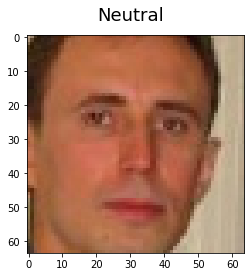

In [64]:
img_src = 'n3.jpg'
img = cv2.imread(img_src)
##Prediction Part

img_pred = image.load_img('n3.jpg', target_size = (64, 64))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)
rslt = classifier.predict(img_pred)

ind = training_set.class_indices

if rslt[0][0] == 1:
    prediction = "SMILING"
else:
    prediction = "Neutral"

target_width = 50
target_height = 50
target_size = (target_width, target_height)

img = cv2.resize(img, target_size)
img = img.reshape(1, target_width, target_height, 3)


fig, ax = plt.subplots()
fig.suptitle(prediction, fontsize=18)

np_img = mpimg.imread(img_src)
plt.imshow(np_img)

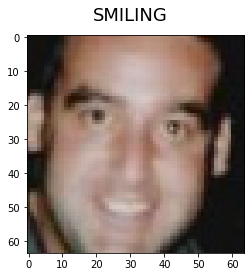

In [66]:
img_src = 'smile3.jpg'
img = cv2.imread(img_src)
##Prediction Part

img_pred = image.load_img('smile3.jpg', target_size = (64, 64))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)
rslt = classifier.predict(img_pred)

ind = training_set.class_indices

if rslt[0][0] == 1:
    prediction = "SMILING"
else:
    prediction = "Neutral"

target_width = 50
target_height = 50
target_size = (target_width, target_height)

img = cv2.resize(img, target_size)
img = img.reshape(1, target_width, target_height, 3)


fig, ax = plt.subplots()
fig.suptitle(prediction, fontsize=18)

np_img = mpimg.imread(img_src)
plt.imshow(np_img)